# Histogram-Based Approach

In [55]:
import numpy as np
from matplotlib import pyplot as plt
from utils.edge_extraction import extract_working_region
import cv2
from utils.image_conversion import *

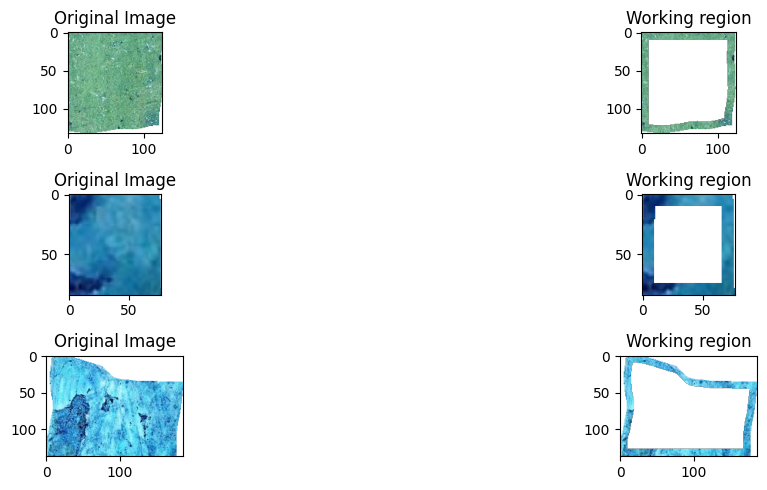

In [83]:
image_green1 = cv2.imread("data/data/5.34.1.png", cv2.IMREAD_UNCHANGED)
image_green2 = cv2.imread("data/data/5.38.15.png", cv2.IMREAD_UNCHANGED)
image_yellow = cv2.imread("data/data/5.34.34.png", cv2.IMREAD_UNCHANGED)

working_region_image_green1 = extract_working_region(image_green1, threshold=10)
working_region_image_green2 = extract_working_region(image_green2, threshold=10)
working_region_image_yellow = extract_working_region(image_yellow, threshold=10)

fig, axes = plt.subplots(3, 2, figsize=(15, 5))
images = [image_green1, working_region_image_green1, image_green2, working_region_image_green2, image_yellow, working_region_image_yellow]
titles = ["Original Image", "Working region"]

for i, ax_row in enumerate(axes):
    for j, ax in enumerate(ax_row):
        ax.imshow(images[i * 2 + j])
        ax.set_title(titles[j])

plt.tight_layout()
plt.show()

In [68]:
def get_only_valid_pixels(input_image: np.ndarray) -> np.ndarray:
    # Extract pixels with alpha channel value different from 0
    valid_pixels = input_image[input_image[:, :, 3] != 0]

    # Reshape to (num_pixels, 4)
    reshaped_image = valid_pixels.reshape((-1, 4))

    # Determine the dimensions of the reshaped image
    num_pixels = reshaped_image.shape[0]
    width = int(np.sqrt(num_pixels))
    height = (num_pixels + width - 1) // width

    # Pad the reshaped image to make it rectangular
    padded_image = np.zeros((height * width, 4), dtype=np.uint8)
    padded_image[:num_pixels, :] = reshaped_image

    # Reshape the padded image to the desired dimensions
    final_image = padded_image.reshape((height, width, 4))

    # Split channel
    b, g, r, a = cv2.split(final_image)
    rgb_image = cv2.merge((b, g, r))

    return rgb_image

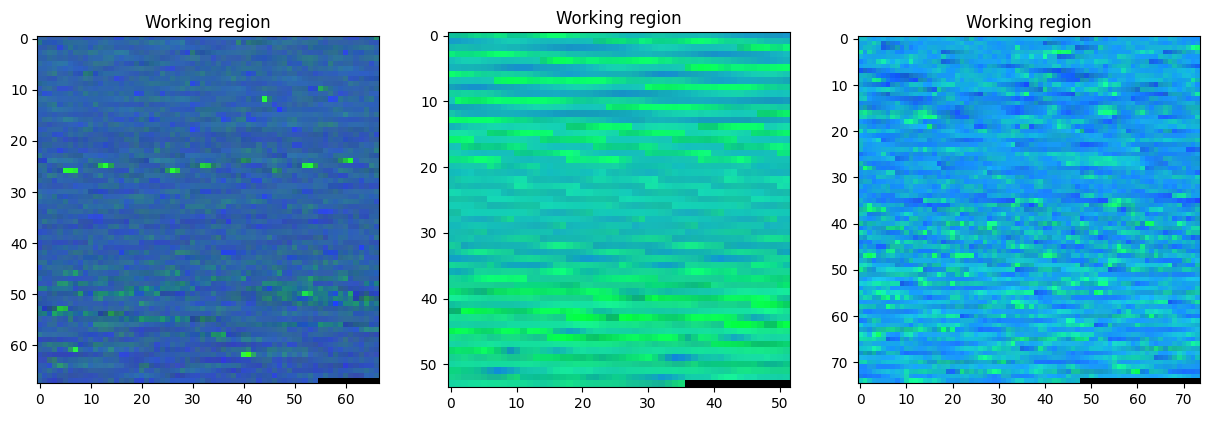

In [85]:
working_region_image_green1 = get_only_valid_pixels(working_region_image_green1)
working_region_image_green2 = get_only_valid_pixels(working_region_image_green2)
working_region_image_yellow = get_only_valid_pixels(working_region_image_yellow)

working_region_image_green1 = cv.cvtColor(working_region_image_green1, cv.COLOR_BGR2HSV)
working_region_image_green2 = cv.cvtColor(working_region_image_green2, cv.COLOR_BGR2HSV)
working_region_image_yellow = cv.cvtColor(working_region_image_yellow, cv.COLOR_BGR2HSV)


fig, axes = plt.subplots(1, 3, figsize=(15, 5))
images = [working_region_image_green1, working_region_image_green2,working_region_image_yellow]
titles = ["Working region"]

for i, ax in enumerate(axes):
    ax.imshow(images[i])
    ax.set_title(titles[0])

plt.show()

In [86]:
hist_img_green1 = cv2.calcHist([working_region_image_green1], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
cv2.normalize(hist_img_green1, hist_img_green1, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

hist_img_green2 = cv2.calcHist([working_region_image_green2], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
cv2.normalize(hist_img_green2, hist_img_green2, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

hist_img_yellow = cv2.calcHist([working_region_image_yellow], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
cv2.normalize(hist_img_yellow, hist_img_yellow, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

cp_green_green = cv2.compareHist(hist_img_green1, hist_img_green2, cv2.HISTCMP_CORREL)
print(f"Similarity Score (Green-Green): ", round(cp_green_green, 2))

cp_green_yellow = cv2.compareHist(hist_img_green1, hist_img_yellow, cv2.HISTCMP_CORREL)
print(f"Similarity Score (Green1-Yellow): ", round(cp_green_yellow, 2))

cp_green2_yellow = cv2.compareHist(hist_img_green2, hist_img_yellow, cv2.HISTCMP_CORREL)
print(f"Similarity Score (Green2-Yellow): ", round(cp_green2_yellow, 2))

cp_yellow_yellow = cv2.compareHist(hist_img_yellow, hist_img_yellow, cv2.HISTCMP_CORREL)
print(f"Similarity Score (Yellow-Yellow): ", round(cp_yellow_yellow, 2))

Similarity Score (Green-Green):  -0.08
Similarity Score (Green1-Yellow):  -0.08
Similarity Score (Green2-Yellow):  0.13
Similarity Score (Yellow-Yellow):  1.0


In [87]:
hist_img_green1

array([[[8.3507309e-03, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 5.5671539e-03, 2.0876827e-03, 6.9589424e-04],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.3917885e-03,
         1.9485038e-02, 4.1753654e-03, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.5309673e-02,
         4.8712594e-03, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 6.9589424e-04, 2.0876827e-03,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0

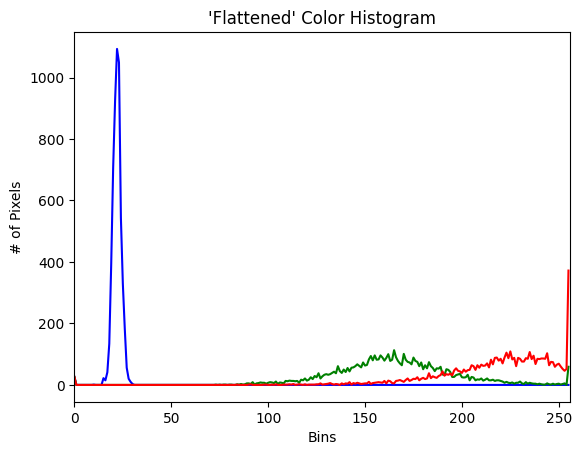

In [89]:
chans = cv2.split(working_region_image_yellow)
colors = ("b", "g", "r")
plt.figure()
plt.title("'Flattened' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
# loop over the image channels
for (chan, color) in zip(chans, colors):
	# create a histogram for the current channel and plot it
	hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
	plt.plot(hist, color=color)
	plt.xlim([0, 256])

In [90]:
hist = cv2.calcHist([working_region_image_green1], [0, 1, 2],
	None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
print("3D histogram shape: {}, with {} values".format(
	hist.shape, hist.flatten().shape[0]))

3D histogram shape: (8, 8, 8), with 512 values


In [91]:
hist = cv2.calcHist([working_region_image_yellow], [0, 1, 2],
	None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
print("3D histogram shape: {}, with {} values".format(
	hist.shape, hist.flatten().shape[0]))

3D histogram shape: (8, 8, 8), with 512 values


In [92]:
def plot_histogram(image, title, mask=None):
    # split the image into its respective channels, then initialize
    # the tuple of channel names along with our figure for plotting
    chans = cv2.split(image)
    colors = ("b", "g", "r")
    plt.figure()
    plt.title(title)
    plt.xlabel("Bins")
    plt.ylabel("# of Pixels")
    plt.ylim([0, 256])
    # loop over the image channels
    for (chan, color) in zip(chans, colors):
        # create a histogram for the current channel and plot it
        hist = cv2.calcHist([chan], [0], mask, [256], [0, 256])
        plt.plot(hist, color=color)
        plt.xlim([0, 256])

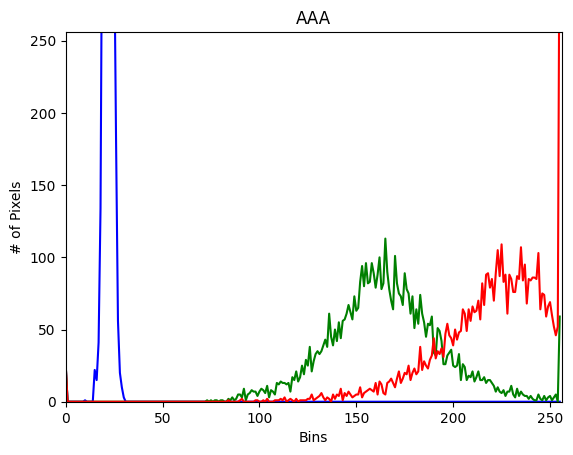

In [93]:
plot_histogram(working_region_image_yellow, "AAA")

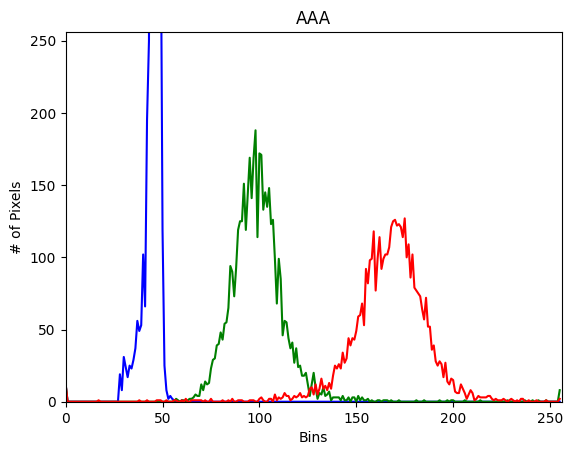

In [94]:
plot_histogram(working_region_image_green1, "AAA")

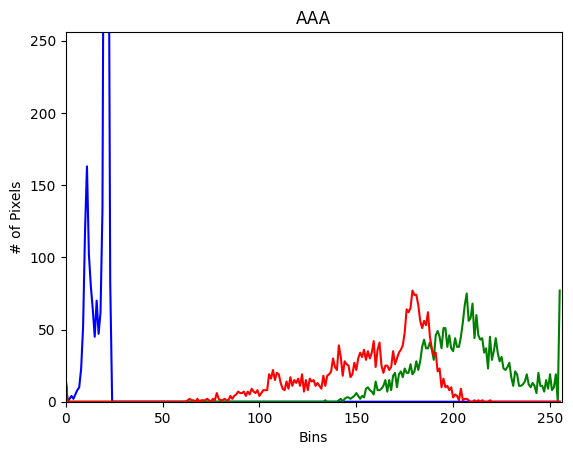

In [95]:
plot_histogram(working_region_image_green2, "AAA")

In [88]:
import os
from utils.edge_extraction import *
import cv2

def create_dataset(img_dir):

    working_regions = []
    for file in os.listdir(img_dir):
        if os.path.splitext(file)[1] != ".png":
            continue

        image = cv.imread(os.path.join(img_dir, file), cv.IMREAD_UNCHANGED)
        working_region = extract_working_region(image, threshold=5)
        working_regions.append(filter_working_region(working_region)) # bgr working region

    histograms = []
    for working_region in working_regions:
        hist_src = cv2.calcHist([working_region], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
        hist_dst = cv2.normalize(hist_src, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
        histograms.append(hist_dst)

    # DEBUG
    for i, histogram in enumerate(histograms):
        if i == len(histograms) - 1:
            break
        print(cv2.compareHist(histograms[i], histograms[i + 1], cv2.HISTCMP_CORREL))

    return np.array(histograms)

In [90]:
X = create_dataset("./data/data")
print(X.shape)
X = X.reshape(X.shape[0], -1)
X.shape

0.9056992125056251
0.46940512799956224
0.5557155521532741
0.4866902179383927
0.37282277179171414
0.8941581751507459
0.7738923890769039
0.804760220018963
0.3433704932066834
0.43074110286892286
0.35708911932058496
0.30712003276525807
0.36120254563870385
0.7584932845259009
0.24792339169150257
0.583216832458847
0.2270249083436473
0.2844933297310962
0.40131416079581084
0.3315729735355134
0.9345674916150641
0.7571184079979002
0.6418812224049761
0.6785985255765149
0.420457993972723
0.8287055673668571
0.7579731063483081
0.4348871780025017
0.8647588563378601
0.47635694940325113
0.6688055578248212
0.8141301528166692
0.5851953545832286
0.6360352059133652
0.5866775327982346
0.8282819110656876
0.47602854272512446
0.9529210684517373
0.2363096411788916
0.005568295594634296
0.5931808623803997
0.9390016146793375
0.6888341718987632
0.8980252725798024
-0.09276902268125205
0.619354240646946
-0.13895310724235402
0.04485140384038084
0.9156229007971571
-0.08338574780510918
-0.06784829600379555
0.850988450590

(328, 512)

In [81]:
def histogram_similarity(hist1, hist2):
    hist1 = hist1.reshape((8,8,8))
    hist2 = hist2.reshape((8,8,8))
    return cv2.compareHist(hist1, hist2, cv2.HISTCMP_CORREL)

from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2, min_samples=10, metric=histogram_similarity).fit(X)
labels = db.labels_
print(labels)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Estimated number of clusters: 1
Estimated number of noise points: 0
